![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
crimes = pd.read_csv("LA_crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
# Start coding here
# Use as many cells as you need

#Which hours has highest frequency of crimes?
# Pseudo code:
        # 1) Convert TIME occ to data time
        # 2) Apply .value_counts(Normalize= True)
        # 2) Create a visualization to spot addtitonal patterns and confirm

crimes.dtypes

DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC        object
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
LOCATION        object
dtype: object

In [3]:
#Based on this Noon appears to be the highest frequency hour for crime
crimes['TIME OCC'].value_counts()
#There are several values that are not formatted properly, however they are in such low numbers that formatting them would not change results by much.

TIME OCC
1200    6462
1800    3991
2000    3769
1700    3754
0001    3587
        ... 
2332       4
2259       3
0511       3
0528       3
0531       3
Name: count, Length: 1439, dtype: int64

In [4]:
#Subset to get just hours which are first two elements of the strings
crimes['Hour'] = crimes['TIME OCC'].str[:2]

In [5]:
#Use value counts to explore patterns 
crimes['Hour'].value_counts() #Optional: I can use normalize=True arguement to see what percent each index makes up

Hour
12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
00     8728
21     8701
22     8531
13     8474
10     8440
08     7523
23     7419
09     7092
01     5836
06     5621
07     5403
02     4726
03     3943
04     3238
05     3171
Name: count, dtype: int64

In [6]:
# Convert to int type
crimes['Hour'] = crimes['Hour'].astype(int)

In [7]:
#Check missing values
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
Hour                 0
dtype: int64

In [8]:
#Check for duplicates
crimes.duplicated().value_counts()

False    185715
Name: count, dtype: int64

In [9]:
crimes.dtypes

DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC        object
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
LOCATION        object
Hour             int64
dtype: object

In [10]:
#Check if Hour has any missing values
crimes['Hour'].isna().sum()

0

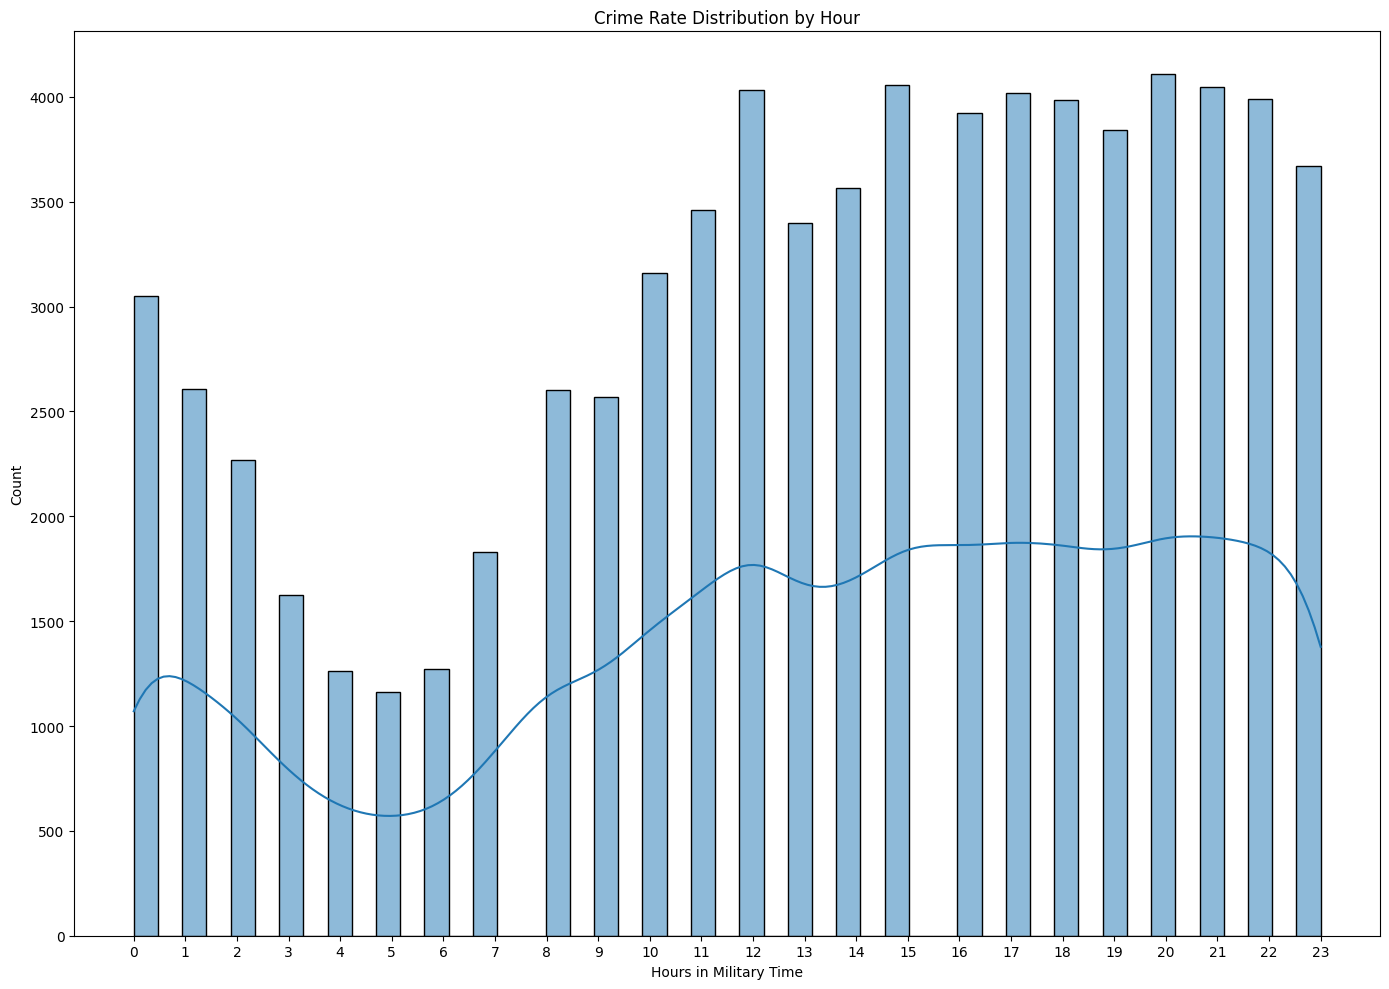

In [96]:

# Plot the histogram
plt.figure(figsize=(14,10))
sns.histplot(data=crimes, x='Hour',kde=True)
plt.xticks(np.arange(0, 24,1),ha='center')
plt.title('Crime Rate Distribution by Hour')
plt.xlabel('Hours in Military Time')
plt.tight_layout()
plt.show()
#Observation: This confirms what value_counts() showed which is that peak crime hour is 12pm

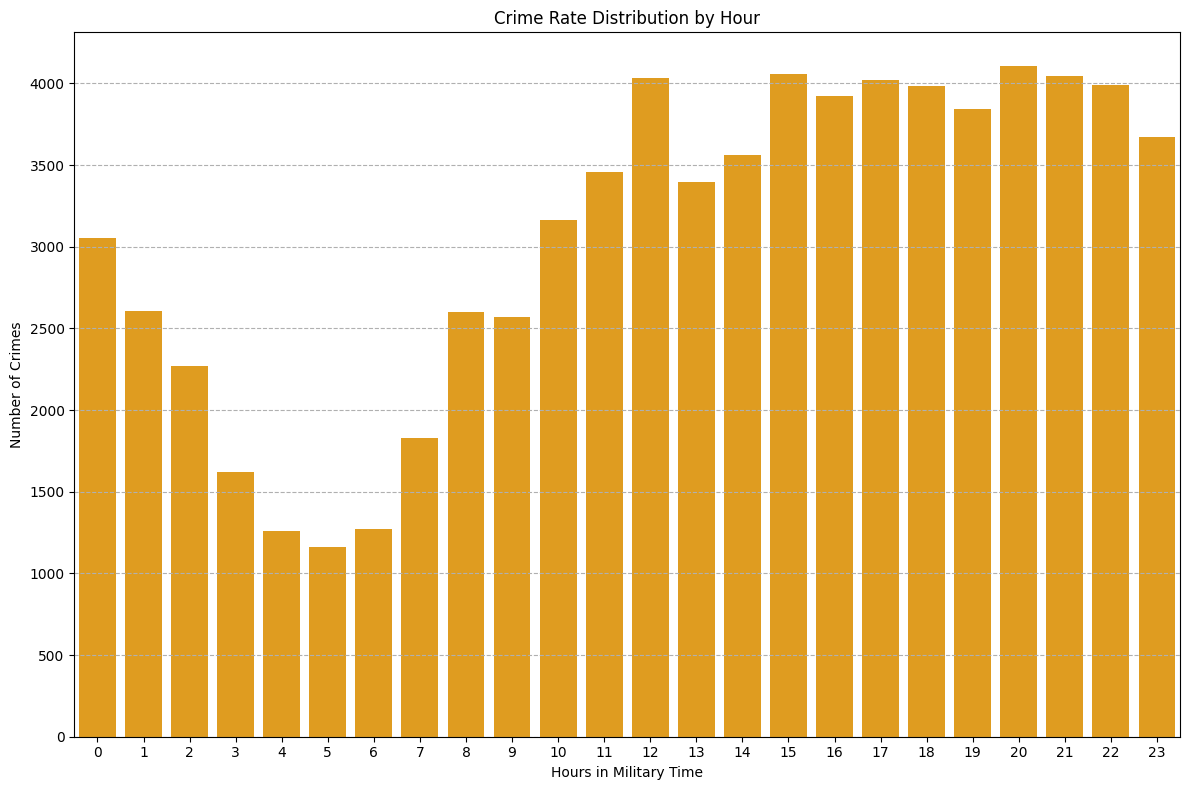

In [109]:
# Count the number of crimes per hour
crime_counts = crimes['Hour'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=crime_counts.index, y=crime_counts.values, color='orange')

# Set x-axis ticks and labels
plt.xticks(np.arange(0, 24, 1), ha='center')

# Add title and labels
plt.title('Crime Rate Distribution by Hour')
plt.xlabel('Hours in Military Time')
plt.ylabel('Number of Crimes')

# Tight layout for better spacing
plt.tight_layout()

plt.grid(axis='y',linestyle='--')
# Show the plot
plt.show()


In [11]:
peak_crime_hour = int(12)

In [12]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'Hour'],
      dtype='object')

In [181]:
# Which area has largest frequency of night crimes (10pm-4am)
# Pseudo Code:
        # Explor area column
        # Create a mask to filter for times 10pm-4am
        # Apply mask and Use value_counts() while subsetting for area 

In [13]:
crimes['AREA NAME'].value_counts(normalize=True)
# Highest value is Central with approximately 8% of crimes happening here.
#Observation: Statistically speaking I can assume that based on this distribution Central should remain the Highest Crime area. However I will apply mask just to be sure

AREA NAME
Central        0.080467
Southwest      0.064319
77th Street    0.063210
Pacific        0.053431
Hollywood      0.052564
Southeast      0.051536
Olympic        0.050691
Newton         0.049280
Van Nuys       0.046421
N Hollywood    0.045780
Wilshire       0.045672
Topanga        0.045651
Rampart        0.044940
West Valley    0.043626
West LA        0.042598
Northeast      0.041074
Devonshire     0.039905
Mission        0.037638
Harbor         0.035635
Hollenbeck     0.033347
Foothill       0.032216
Name: proportion, dtype: float64

In [14]:
# Mask 10pm-4am
mask = crimes['Hour'].isin([22,23,0,1,2,3])

In [15]:
# Apply mask to crimes hours and area
filter_crimes = crimes[mask]

In [16]:
filter_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [17]:
# Filter for just AREA NAME and Hour 
Area_Hour = filter_crimes[['AREA NAME','Hour']]

In [18]:
Area_Hour.head()

,AREA NAME,Hour
8,77th Street,0
10,Devonshire,1
30,Newton,0
33,Newton,23
36,Foothill,0


In [19]:
#Use value_counts()
Area_Hour.value_counts()

#Observation this is not grouping by area, need to use groupby

AREA NAME    Hour
Central      22      764
             23      717
Southeast    0       664
77th Street  0       629
Central      0       574
                    ... 
West LA      3       142
Hollenbeck   2       135
Foothill     3       128
Harbor       3       124
Hollenbeck   3       121
Name: count, Length: 126, dtype: int64

In [20]:
Grouped_area = Area_Hour.groupby('AREA NAME')['Hour'].sum()

In [21]:
peak_night = Grouped_area.sort_values(ascending=False)

In [22]:
peak_night.head()

#As expected earlier Central is the highest crime area from 10pm-4am

AREA NAME
Central        35546
Hollywood      26186
Southwest      23570
77th Street    23171
Olympic        21535
Name: Hour, dtype: int64

In [ ]:
#Getting the index of the max values using .idxmax()
Max_area = Grouped_area.idxmax()


'Central'

In [24]:
peak_night_crime_location = Max_area

In [25]:
peak_night_crime_location

'Central'

In [26]:
# Identify the number of crimes committed against victims of different afe groups
        #Pseudo Code:
        # Create age buckets
        # Groupby age buckets and count
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'Hour'],
      dtype='object')

In [27]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [197]:
#Just curious about what the most common type of crime is.
#crimes['Crm Cd Desc'].value_counts(normalize=True)

#Observation: 12% of crimes are identity theft, 10% of crimes are BATTERY-SIMPLE ASSAULT

In [28]:
#Check Vict Age dtype
crimes['Vict Age'].dtypes

dtype('int64')

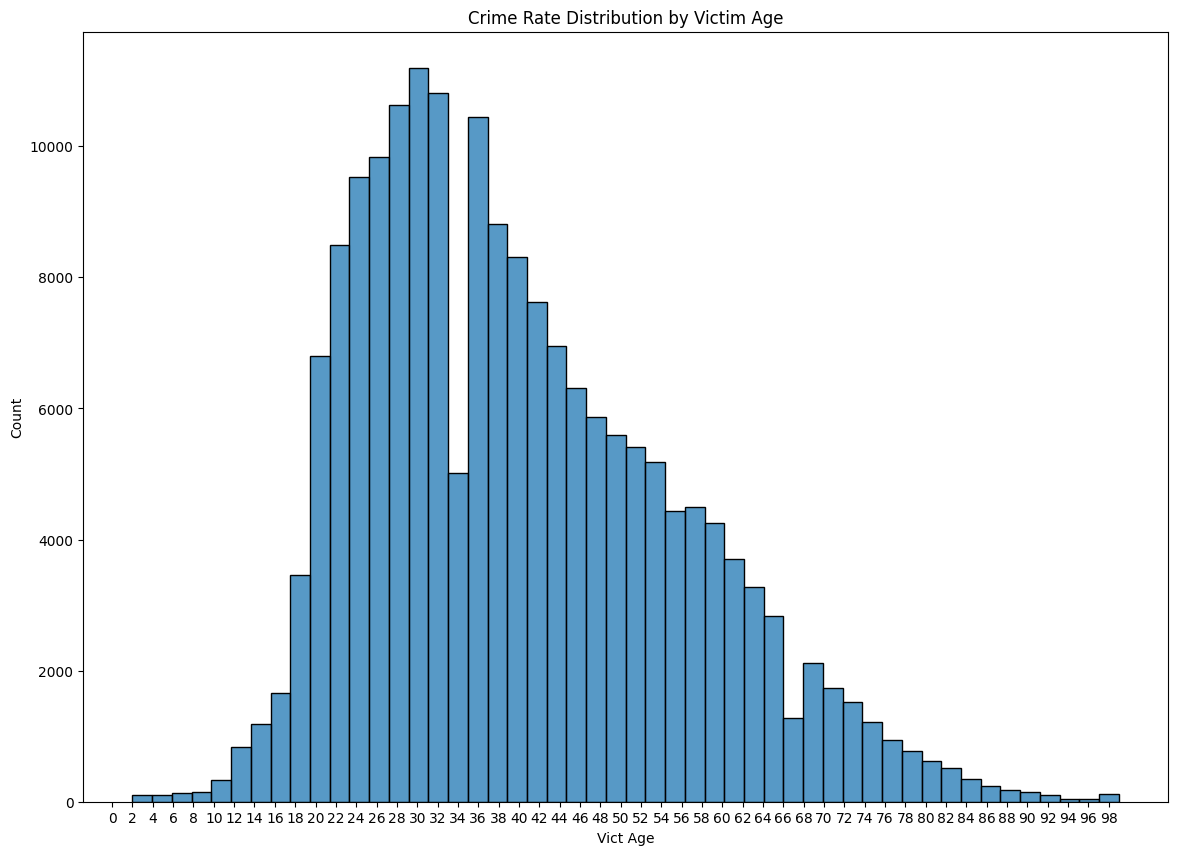

In [48]:
#Visualize data to spot trends or patterns 

# Plot the histogram
plt.figure(figsize=(14,10))
sns.histplot(data=crimes, x='Vict Age', bins=50)
plt.xticks(np.arange(0, 100,2))
plt.title('Crime Rate Distribution by Victim Age')
plt.show()
#Observation: This shows that data is normally distributed and that highest frequency of crimes committed against are victims ages 26-34.

Observation: It is apparent from this graph that Victims ages '26-34' have the highest rate of crime committed against them. I must now group by age groups to display this using the data. 

In [29]:
#Creating masks for different ages groups
age_bins = [0, 18, 26, 35, 45, 55, 65, float('inf')]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['victim_ages'] = pd.cut(crimes['Vict Age'], 
                              bins=age_bins, 
                              labels=age_labels, 
                              right=False)  # right=False means [0,17), [18,25), etc.


In [75]:
crimes.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,victim_ages,time_diff
169921,231812834,2023-07-03,2023-07-03,0020,Southeast,ROBBERY,20,M,H,HAND GUN,Invest Cont,400 W IMPERIAL HY,0,18-25,0.0
168267,230213539,2023-07-03,2023-07-03,0001,Rampart,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,OLYMPIC,0,18-25,0.0
141363,230510615,2023-07-03,2023-07-03,0030,Harbor,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",19,M,H,HAND GUN,Invest Cont,800 KING AV,0,18-25,0.0
138541,230313050,2023-07-03,2023-07-03,0900,Southwest,INTIMATE PARTNER - SIMPLE ASSAULT,51,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3600 CHESAPEAKE AV,9,45-54,0.0
163832,231812838,2023-07-03,2023-07-03,0100,Southeast,ROBBERY,36,M,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,120TH ST,1,35-44,0.0


In [50]:
victim_ages=crimes['victim_ages'].value_counts()

In [51]:
victim_ages

victim_ages
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

## Most common occurences of crimes

In [55]:
crimes.groupby('AREA NAME')['Crm Cd Desc'].value_counts()

AREA NAME    Crm Cd Desc                                     
77th Street  THEFT OF IDENTITY                                   1977
             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      1344
             BATTERY - SIMPLE ASSAULT                            1216
             INTIMATE PARTNER - SIMPLE ASSAULT                   1002
             ROBBERY                                              795
                                                                 ... 
Wilshire     RECKLESS DRIVING                                       1
             RESISTING ARREST                                       1
             SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT       1
             THEFT PLAIN - ATTEMPT                                  1
             VEHICLE - STOLEN                                       1
Name: count, Length: 1503, dtype: int64

In [56]:
import pandas as pd
import plotly.express as px

# Assuming 'crime_counts' is the output of your groupby operation
crime_counts = crimes.groupby('AREA NAME')['Crm Cd Desc'].value_counts().reset_index(name='count')

# Bar chart showing total crimes per area
fig = px.bar(crime_counts, 
             x='AREA NAME', 
             y='count', 
             color='Crm Cd Desc', 
             title='Crime Counts by Area',
             labels={'AREA NAME': 'Area', 'count': 'Number of Crimes', 'Crm Cd Desc': 'Crime Type'},
             height=600)
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()


In [73]:
crimes['Crm Cd Desc'].value_counts().sort_values()

Crm Cd Desc
DRUNK ROLL                                            1
LYNCHING                                              1
BUNCO, ATTEMPT                                        1
FALSE POLICE REPORT                                   1
UNAUTHORIZED COMPUTER ACCESS                          1
                                                  ...  
CRIMINAL THREATS - NO WEAPON DISPLAYED             5118
ROBBERY                                            6470
INTIMATE PARTNER - SIMPLE ASSAULT                 11965
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    13214
BATTERY - SIMPLE ASSAULT                          19693
Name: count, Length: 80, dtype: int64

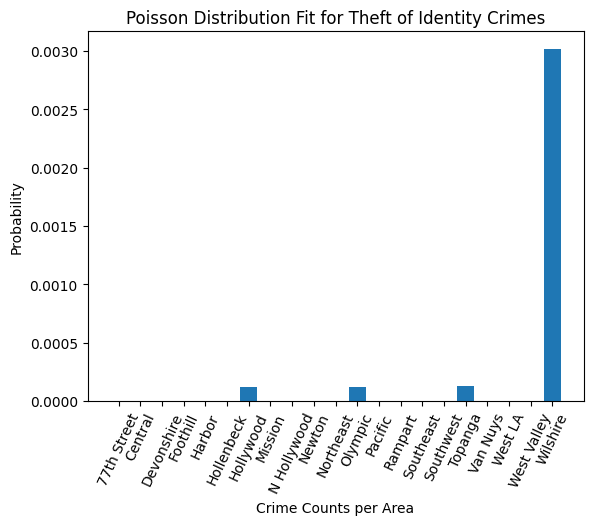

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Example: Number of "THEFT OF IDENTITY" crimes in a specific area
crime_counts = crimes[crimes['Crm Cd Desc'] == 'ROBBERY'].groupby('AREA NAME').size()

# Fit a Poisson distribution to the data
lambda_ = np.mean(crime_counts)  # Mean count of crimes (rate parameter)
poisson_data = poisson.pmf(crime_counts, lambda_)

# Plot the results
plt.bar(crime_counts.index, poisson_data)
plt.xlabel('Crime Counts per Area')
plt.ylabel('Probability')
plt.title('Poisson Distribution Fit for Theft of Identity Crimes')
plt.xticks(rotation= 65)
plt.show()


In [67]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,victim_ages,time_diff
204,222017118,2022-11-14,2020-01-01,0001,Olympic,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,8,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1800 S NORMANDIE AV,0,0-17,0.0
416,231804643,2023-01-10,2020-01-01,0800,Southeast,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,900 E IMPERIAL HY,8,0-17,0.0
230,231304402,2023-01-06,2020-01-01,1200,Newton,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,100 E 28TH ST,12,0-17,0.0
599,230705655,2023-01-06,2020-01-01,1200,Wilshire,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1100 S NORTON AV,12,0-17,0.0
609,232010431,2023-05-17,2020-01-01,1200,Olympic,INTIMATE PARTNER - SIMPLE ASSAULT,35,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,FEDORA ST,12,35-44,0.0


## Geo Mapping Crimes using Plotly

In [ ]:
#Installing geopy
pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 618.9 kB/s eta 0:00:000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import Nominatim
import time

# Step 1: Initialize the geocoder
geolocator = Nominatim(user_agent="crime_mapping")

# Step 2: Function to geocode an address
def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        return None, None

# Step 3: Apply geocoding to your dataframe with a delay to avoid rate limiting
latitudes = []
longitudes = []
for address in crimes['LOCATION']:
    latitude, longitude = geocode_address(address)
    latitudes.append(latitude)
    longitudes.append(longitude)
    time.sleep(1)  # Adding a delay of 1 second between requests

crimes['latitude'] = latitudes
crimes['longitude'] = longitudes

# Step 4: Create the plot
fig = px.scatter_mapbox(crimes, 
                        lat='latitude', 
                        lon='longitude', 
                        color='Crm Cd Desc',  # Crime description or any other feature you want to visualize
                        hover_name='LOCATION',  # Hover text
                        hover_data=['DATE OCC', 'TIME OCC'],  # Other details to show on hover
                        title='LA Crimes Map')

# Use Mapbox style
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=10, mapbox_center={"lat": 34.0522, "lon": -118.2437})  # LA center

# Show the plot
fig.show()



KeyboardInterrupt: 